<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="5">Classification with Python</font></h1>

In this notebook we try to practice all the classification algorithms that we learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

Lets download the dataset

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2019-05-12 18:58:59--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.07s   

2019-05-12 18:58:59 (304 KB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File  

In [3]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
df.shape

(346, 10)

In [5]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,346.000000,346.000000,346.000000,346.000000,346.000000
mean,202.167630,202.167630,943.641618,22.653179,30.939306
std,115.459715,115.459715,109.425530,7.991006,6.039418
min,0.000000,0.000000,300.000000,7.000000,18.000000
25%,107.250000,107.250000,900.000000,15.000000,27.000000
50%,204.500000,204.500000,1000.000000,30.000000,30.000000
75%,298.750000,298.750000,1000.000000,30.000000,35.000000
max,399.000000,399.000000,1000.000000,30.000000,51.000000


### Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing



Let’s see how many of each class is in our data set 

In [7]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


Lets plot some columns to underestand data better:

In [8]:
# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y

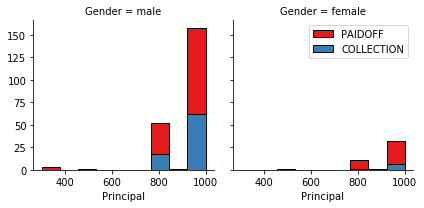

In [9]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

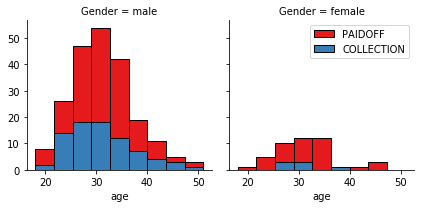

In [10]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

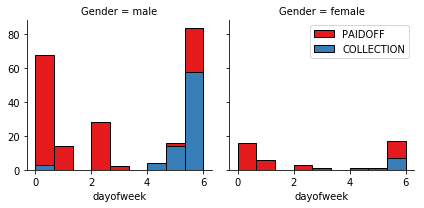

In [11]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [12]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df['max_loan'] = df['Principal'].apply(lambda x: 1 if (x>900) else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,max_loan
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1


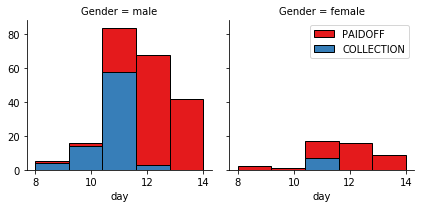

In [13]:
df['day'] = df['effective_date'].dt.day
bins = np.linspace(df.day.min(), df.day.max(), df.day.max()-df.day.min())
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'day', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

In [14]:
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,max_loan,day
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0,1,8
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0,1,8
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0,1,8
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1,1,9
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1,1,9


In [15]:
df.groupby(['Principal'])['loan_status'].value_counts(normalize=True)

Principal  loan_status
300        PAIDOFF        1.000000
500        PAIDOFF        1.000000
800        PAIDOFF        0.777778
           COLLECTION     0.222222
900        PAIDOFF        1.000000
1000       PAIDOFF        0.736434
           COLLECTION     0.263566
Name: loan_status, dtype: float64

In [16]:
import datetime as dt
df['loan_time'] = df['due_date']- df['effective_date']
df['loan_time'] = df['loan_time'].dt.days + 1
print(df.groupby(['Principal', 'loan_time'])['loan_status'].value_counts(normalize=True))
print(df.groupby(['max_loan', 'loan_time'])['loan_status'].value_counts(normalize=True))

Principal  loan_time  loan_status
300        7          PAIDOFF        1.000000
500        7          PAIDOFF        1.000000
           15         PAIDOFF        1.000000
800        7          PAIDOFF        1.000000
           15         PAIDOFF        0.783784
                      COLLECTION     0.216216
           30         PAIDOFF        0.666667
                      COLLECTION     0.333333
900        7          PAIDOFF        1.000000
           15         PAIDOFF        1.000000
1000       7          PAIDOFF        1.000000
           14         PAIDOFF        1.000000
           15         PAIDOFF        0.777778
                      COLLECTION     0.222222
           30         PAIDOFF        0.723529
                      COLLECTION     0.276471
           45         PAIDOFF        0.600000
                      COLLECTION     0.400000
           60         PAIDOFF        0.583333
                      COLLECTION     0.416667
Name: loan_status, dtype: float64
max_loan  lo

In [17]:
df.groupby(['loan_time'])['loan_status'].value_counts(normalize=True)

loan_time  loan_status
7          PAIDOFF        1.000000
14         PAIDOFF        1.000000
15         PAIDOFF        0.784173
           COLLECTION     0.215827
30         PAIDOFF        0.721591
           COLLECTION     0.278409
45         PAIDOFF        0.600000
           COLLECTION     0.400000
60         PAIDOFF        0.583333
           COLLECTION     0.416667
Name: loan_status, dtype: float64

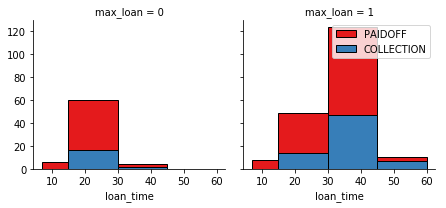

In [18]:
bins = [7, 15, 30, 45, 60]
g = sns.FacetGrid(df, col="max_loan", hue="loan_status", palette="Set1", col_wrap=5)
g.map(plt.hist, 'loan_time', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

## Convert Categorical features to numerical values

Lets look at gender:

In [19]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [20]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend,max_loan,day,loan_time
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0,1,8,30
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0,1,8,30
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0,1,8,15
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1,1,9,30
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1,1,9,30


## One Hot Encoding  
#### How about education?

In [21]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Feature befor One Hot Encoding

In [22]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [23]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,Master or Above,college
0,1000,30,45,0,0,0,1,0,0
1,1000,30,33,1,0,1,0,0,0
2,1000,15,27,0,0,0,0,0,1
3,1000,30,28,1,1,0,0,0,1
4,1000,30,29,0,1,0,0,0,1


In FeatureAlt, I try to use an alternative set of features that might provide a better result.

In [24]:
FeatureAlt1 = df[['Principal', 'terms','age','Gender','weekend', 'loan_time']].copy()
FeatureAlt1 = pd.concat([FeatureAlt1,pd.get_dummies(df['education'])], axis=1)

FeatureAlt2 = df[['Principal','age','Gender','weekend', 'loan_time']].copy()
FeatureAlt2 = pd.concat([FeatureAlt2,pd.get_dummies(df['education'])], axis=1)

FeatureAlt3 = df[['Principal','age','Gender', 'loan_time', 'day']].copy()
FeatureAlt3 = pd.concat([FeatureAlt3,pd.get_dummies(df['education'])], axis=1)

### Feature selection

Lets defind feature sets, X:

In [25]:
X = Feature
Xalt1 = FeatureAlt1
Xalt2 = FeatureAlt2
Xalt3 = FeatureAlt3

What are our lables?

In [26]:
y = df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[1,0]).values
y.mean()

0.75144508670520227

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [27]:
X= preprocessing.StandardScaler().fit(X).transform(X)
Xalt1 = preprocessing.StandardScaler().fit(Xalt1).transform(Xalt1)
Xalt2 = preprocessing.StandardScaler().fit(Xalt2).transform(Xalt2)
Xalt3 = preprocessing.StandardScaler().fit(Xalt3).transform(Xalt3)

# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression



__ Notice:__ 
- You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# K Nearest Neighbor(KNN)
Notice: You should find the best k to build the model with the best accuracy.  
**warning:** You should not use the __loan_test.csv__ for finding the best k, however, you can split your train_loan.csv into train and test to find the best __k__.

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn import metrics

The following function visualizes the results for optimal k value in the KNN algorithm and the accuracy that was obtained with this k value.

In [29]:
def most_frequent(array):
    L = list(array)
    return max(set(L), key = L.count) 

In [30]:
def Visualize(irange, k_array, a_array):
    fig, ax1 = plt.subplots()
    ax1.plot(irange, k_array, 'b-')
    ax1.set_xlabel('test')
    ax1.set_ylabel('k value', color = 'b')
    ax2 = ax1.twinx()
    ax2.plot(irange, a_array, 'r.')
    ax2.set_ylabel('accuracy', color = 'r')
    fig.tight_layout()
    plt.show()

The following function performs a train - test split, then a KNN algorithm is trained for 10 values of k. The best accuracy and the accompanying k value is returned.

I seemed to get very inconsistant results when training the model. 

I try the following: Do 100 times :
    Train-test split
    train model with k = 1, 2, ..,10
    find k for which test result is the best
and go with the value for k that occurs most frequently

In [31]:
def KNNTest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    krange = range(1,11)
    acc = np.zeros(len(krange))
    for k in krange:
        modKNN = KNN(n_neighbors = k).fit(X_train, y_train)
        yhat = modKNN.predict(X_test) 
        acc[k-1] = metrics.jaccard_similarity_score(y_test, yhat, normalize=True)
    return acc.argmax()+1, acc.max()

In [32]:
def KNNViz(X,y):
    irange = range(0,100)
    k_array = np.zeros(len(irange))
    a_array = np.zeros(len(irange))
    for i in irange:
        k_array[i], a_array[i] = KNNTest(X,y)
    Visualize(irange, k_array, a_array)
    print(a_array.mean())
    return int(most_frequent(k_array))

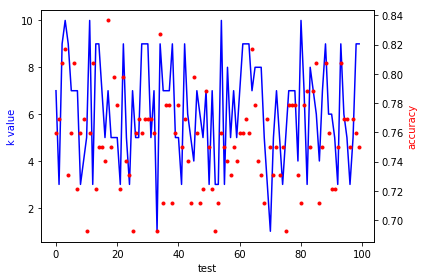

0.755480769231
7


In [33]:
k = KNNViz(X,y)
print(k)
modKNN = KNN(n_neighbors = k).fit(X, y)

I tried to improve my performance by playing around with a few other feature sets.
Mostly Xalt2 gave better results than the original feature set.

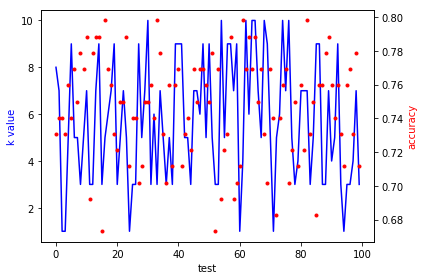

0.74625
3


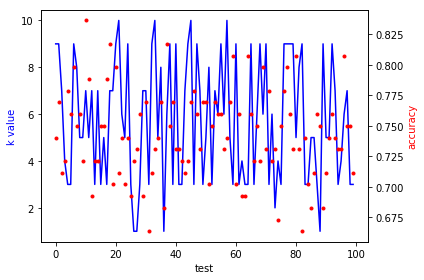

0.742692307692
3


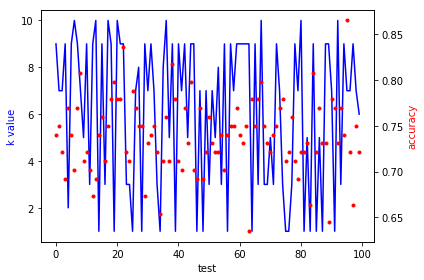

0.738846153846
9


In [34]:
k = KNNViz(Xalt1, y)
print(k)
modKNN1 = KNN(n_neighbors = k).fit(Xalt1, y)
k = KNNViz(Xalt2, y)
print(k)
modKNN2 = KNN(n_neighbors = k).fit(Xalt2, y)
k = KNNViz(Xalt3, y)
print(k)
modKNN3 = KNN(n_neighbors = k).fit(Xalt3, y)

# Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier as DTC

In [36]:
def DTCTest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    
    krange = range(1,11)
    acc = np.zeros(len(krange))
    for k in krange:
        loanTree = DTC(criterion = 'entropy', max_depth = k).fit(X_train, y_train)
        yhat = loanTree.predict(X_test)
        acc[k-1] = metrics.jaccard_similarity_score(y_test, yhat)
    return acc.argmax()+1, acc.max()

In [37]:
def DTCViz(X,y):
    irange = range(0,100)
    k_array = np.zeros(len(irange))
    a_array = np.zeros(len(irange))
    for i in irange:
        k_array[i], a_array[i] = DTCTest(X,y)
    Visualize(irange, k_array, a_array)
    print(a_array.mean())
    return int(most_frequent(k_array))

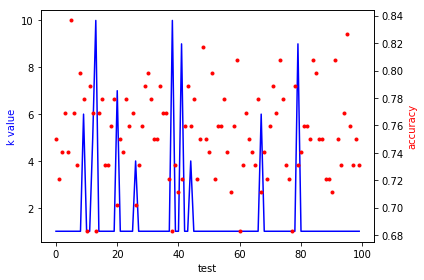

0.752980769231
1


In [38]:
k = DTCViz(X,y)
print(k)
loanTree = DTC(criterion = 'entropy', max_depth = k).fit(X, y)

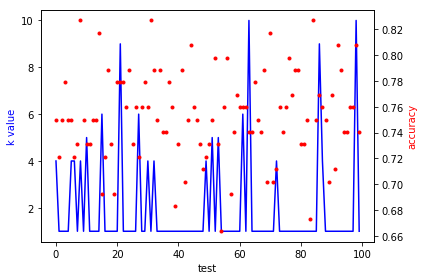

0.752884615385
1


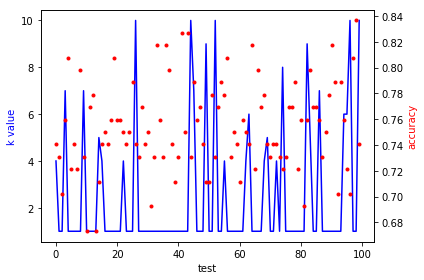

0.754134615385
1


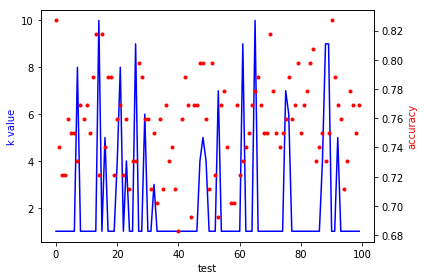

0.755961538462
1


In [39]:
k = DTCViz(Xalt1,y)
print(k)
loanTree1 = DTC(criterion = 'entropy', max_depth = k).fit(Xalt1, y)

k = DTCViz(Xalt2,y)
print(k)
loanTree2 = DTC(criterion = 'entropy', max_depth = k).fit(Xalt2, y)

k = DTCViz(Xalt3,y)
print(k)
loanTree3 = DTC(criterion = 'entropy', max_depth = k).fit(Xalt3, y)

# Support Vector Machine

In [40]:
from sklearn.svm import SVC

In [41]:
def SVMTest(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    Crange = [x/20 for x in range(1,21)]
    acc = np.zeros(len(Crange))
    for Cval in Crange:
        clf = SVC(C = Cval, kernel = 'rbf', gamma = 'auto').fit(X_train, y_train)
        yhat = clf.predict(X_test)
        acc = metrics.jaccard_similarity_score(y_test, yhat)
    return Crange[acc.argmax()], acc.max()

In [42]:
def SVMViz(X,y):
    irange = range(0,100)
    k_array = np.zeros(len(irange))
    a_array = np.zeros(len(irange))
    for i in irange:
        k_array[i], a_array[i] = SVMTest(X,y)
    Visualize(irange, k_array, a_array)
    print(a_array.mean())
    return float(most_frequent(k_array))

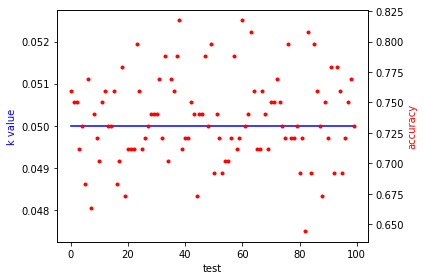

0.736442307692
0.05


In [43]:
Cval = SVMViz(X, y)
print(Cval)
clf = SVC(C = Cval, kernel = 'rbf', gamma = 'auto').fit(X, y)

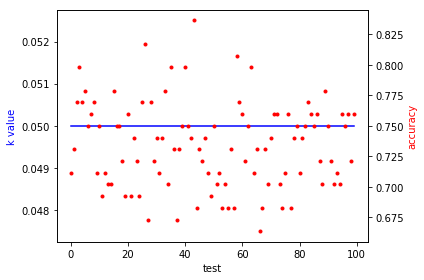

0.734519230769


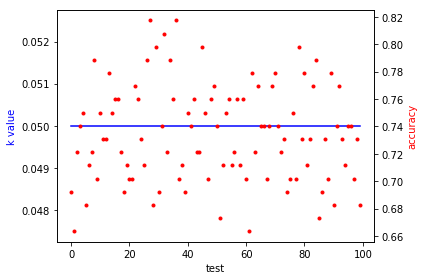

0.734807692308


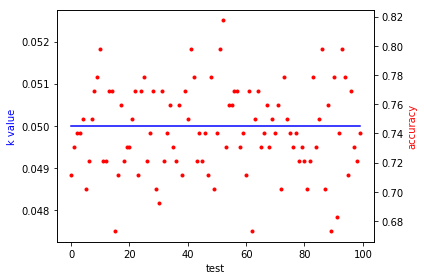

0.742115384615


In [44]:
Cval = SVMViz(Xalt1, y)
clf1 = SVC(C = Cval, kernel = 'rbf', gamma = 'auto').fit(Xalt1, y)

Cval = SVMViz(Xalt2, y)
clf2 = SVC(C = Cval, kernel = 'rbf', gamma = 'auto').fit(Xalt2, y)

Cval = SVMViz(Xalt3, y)
clf3 = SVC(C = Cval, kernel = 'rbf', gamma = 'auto').fit(Xalt3, y)

# Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
def LogRegTest(X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    Crange = [x/20 for x in range(1,21)]
    acc = np.zeros(len(Crange))
    for Cval in Crange:
        LR = LogisticRegression(C = Cval, solver='liblinear').fit(X_train,y_train)
        yhat = LR.predict(X_test)
        acc = metrics.jaccard_similarity_score(y_test, yhat)
    return Crange[acc.argmax()], acc.max()

In [47]:
def LogRegViz(X,y):
    irange = range(0,100)
    k_array = np.zeros(len(irange))
    a_array = np.zeros(len(irange))
    for i in irange:
        k_array[i], a_array[i] = LogRegTest(X,y)
    Visualize(irange, k_array, a_array)
    print(a_array.mean())
    return most_frequent(k_array)

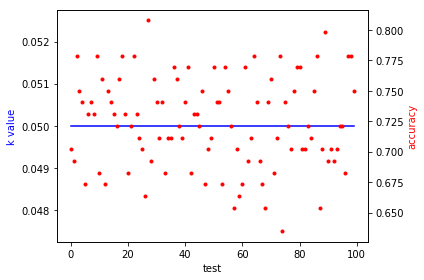

0.724326923077
0.05


In [48]:
Cval = LogRegViz(X, y)
print(Cval)
LR = LogisticRegression(C=Cval, solver='liblinear').fit(X,y)

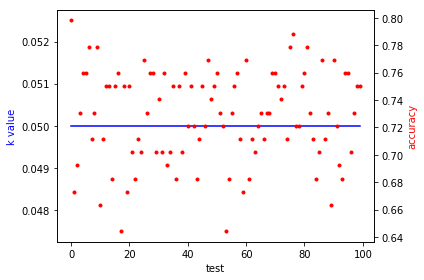

0.728173076923


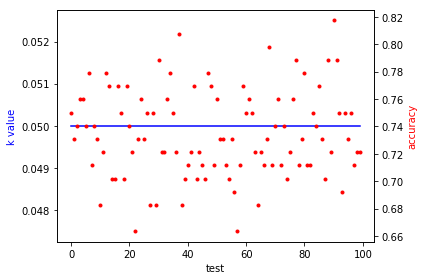

0.734711538462


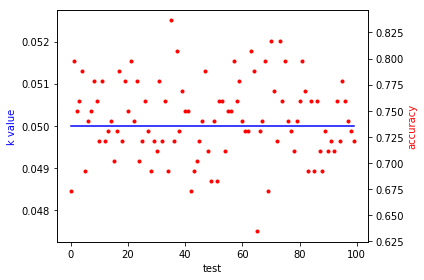

0.742307692308


In [49]:
Cval = LogRegViz(Xalt1, y)
LR1 = LogisticRegression(C=Cval, solver='liblinear').fit(Xalt1,y)

Cval = LogRegViz(Xalt2, y)
LR2 = LogisticRegression(C=Cval, solver='liblinear').fit(Xalt2,y)

Cval = LogRegViz(Xalt3, y)
LR3 = LogisticRegression(C=Cval, solver='liblinear').fit(Xalt3,y)

# Model Evaluation using Test set

In [50]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

First, download and load the test set:

In [51]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2019-05-12 18:59:56--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.193
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.193|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2019-05-12 18:59:56 (455 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation 

In [52]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()
test_df.describe()

,Unnamed: 0,Unnamed: 0.1,Principal,terms,age
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,182.407407,182.407407,914.814815,21.888889,31.833333
std,116.220759,116.220759,174.190751,8.818220,5.992920
min,1.000000,1.000000,300.000000,7.000000,20.000000
25%,79.500000,79.500000,800.000000,15.000000,28.000000
50%,174.000000,174.000000,1000.000000,30.000000,30.500000
75%,300.250000,300.250000,1000.000000,30.000000,36.000000
max,396.000000,396.000000,1000.000000,30.000000,50.000000


Prepare features and the alternative features

In [53]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['day'] = test_df['effective_date'].dt.day
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
test_df['max_loan'] = test_df['Principal'].apply(lambda x: 1 if (x>900) else 0)
test_df['loan_time'] = test_df['due_date']- df['effective_date']
test_df['loan_time'] = test_df['loan_time'].dt.days + 1

In [54]:
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
Feature = test_df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(test_df['education'])], axis=1)

Make featuresets

In [55]:
FeatureAlt1 = test_df[['Principal', 'terms','age','Gender','weekend', 'loan_time']].copy()
FeatureAlt1 = pd.concat([FeatureAlt1,pd.get_dummies(test_df['education'])], axis=1)

FeatureAlt2 = test_df[['Principal','age','Gender','weekend', 'loan_time']].copy()
FeatureAlt2 = pd.concat([FeatureAlt2,pd.get_dummies(test_df['education'])], axis=1)

FeatureAlt3 = test_df[['Principal','age','Gender', 'loan_time', 'day']].copy()
FeatureAlt3 = pd.concat([FeatureAlt3,pd.get_dummies(test_df['education'])], axis=1)

In [56]:
X = Feature
Xalt1 = FeatureAlt1
Xalt2 = FeatureAlt2
Xalt3 = FeatureAlt3

X= preprocessing.StandardScaler().fit(X).transform(X)
Xalt1 = preprocessing.StandardScaler().fit(Xalt1).transform(Xalt1)
Xalt2 = preprocessing.StandardScaler().fit(Xalt2).transform(Xalt2)
Xalt3 = preprocessing.StandardScaler().fit(Xalt3).transform(Xalt3)

y = test_df['loan_status'].replace(to_replace=['PAIDOFF', 'COLLECTION'], value=[1,0]).values
y.mean()

0.7407407407407407

In [57]:
def Fill(yhat, y, row, df):
    df.at[ row , 'Jaccard'] = jaccard_similarity_score(y, yhat)
    df.at[ row , 'F1-score'] = f1_score(y, yhat)
    df.at[ row , 'LogLoss'] = log_loss(y, yhat)
    return df

In the following I calculate both the performance with the original feature set and the alternative feature set I made.

In [58]:
result_df = pd.DataFrame(columns = ['Jaccard', 'F1-score', 'LogLoss'],
                         index = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'])

yhat = modKNN.predict(X)
result_df = Fill(yhat, y, 'KNN', result_df)
yhat = loanTree.predict(X)
result_df = Fill(yhat, y, 'Decision Tree', result_df)
yhat = clf.predict(X)
result_df = Fill(yhat, y, 'SVM', result_df)
yhat = LR.predict(X)
result_df = Fill(yhat, y, 'Logistic Regression', result_df)

print(result_df)

                      Jaccard  F1-score  LogLoss
KNN                  0.740741  0.837209  8.95465
Decision Tree        0.740741  0.851064   8.9547
SVM                  0.740741  0.851064   8.9547
Logistic Regression  0.759259  0.860215  8.31508


In [60]:
X = Xalt3

result_df = pd.DataFrame(columns = ['Jaccard', 'F1-score', 'LogLoss'],
                         index = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression'])

yhat = modKNN3.predict(X)
result_df = Fill(yhat, y, 'KNN', result_df)
yhat = loanTree3.predict(X)
result_df = Fill(yhat, y, 'Decision Tree', result_df)
yhat = clf3.predict(X)
result_df = Fill(yhat, y, 'SVM', result_df)
yhat = LR3.predict(X)
result_df = Fill(yhat, y, 'Logistic Regression', result_df)

print(result_df)

                      Jaccard  F1-score  LogLoss
KNN                  0.759259  0.857143  8.31507
Decision Tree        0.740741  0.851064   8.9547
SVM                  0.740741  0.851064   8.9547
Logistic Regression  0.740741  0.844444  8.95468


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |

<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

<p>Copyright &copy; 2018 <a href="https://cocl.us/DX0108EN_CC">Cognitive Class</a>. This notebook and its source code are released under the terms of the <a href="https://bigdatauniversity.com/mit-license/">MIT License</a>.</p>